In [1]:
import ruclip

ModuleNotFoundError: No module named 'ruclip'

In [2]:
device = 'cpu'
clip, processor = ruclip.load('ruclip-vit-base-patch32-384', device)

In [ ]:
from PIL import Image

In [4]:
from torch.nn.utils.rnn import pad_sequence
import torch

def get_image_emb(image: Image,
                  clip: ruclip.CLIP,
                  processor: ruclip.RuCLIPProcessor,
                  device='cpu'):
    inputs = processor(images=[image])
    
    pixel_values = inputs['pixel_values'].to(device) 
    with torch.no_grad():
        image_emb:torch.Tensor = clip.encode_image(pixel_values)

    image_emb = image_emb / image_emb.norm(dim=-1, keepdim=True)

    return image_emb.cpu()

In [5]:
import torch

def get_text_emb(text: str,
                 clip: ruclip.CLIP,
                 processor: ruclip.RuCLIPProcessor,
                 device='cpu') -> torch.Tensor:
    inputs = processor(text=[text])

    input_ids = inputs['input_ids'].to(device)

    with torch.no_grad():
        text_emb = clip.encode_text(input_ids)

    text_emb = text_emb / text_emb.norm(dim=-1, keepdim=True)

    return text_emb.cpu()

cos_d = 0.1382351815700531
Вероятность "cat": 0.5691175907850266


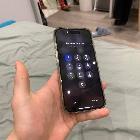

In [ ]:
image_path = "App\\media\\preview\\preview_62c642b6-122c-4a3b-b628-2ae61542be1d.jpg"
txt = 'водопад'
image = Image.open(image_path).convert('RGB')

img_emb = get_image_emb(image, clip, processor)
txt_emb = get_text_emb(txt, clip, processor)
cos_O = torch.matmul(img_emb, txt_emb.T).item()
print(f'cos_d = {cos_O}\nВероятность "{txt}": {(cos_O + 1) / 2}')
image